## Overview
This notebook loads the mystery graph for question 7 on HW 2, and provides some helper functions.

In [14]:
import numpy as np
import numpy.linalg as lin
import networkx as nx
import sklearn
import matplotlib.pyplot as plt
import pickle

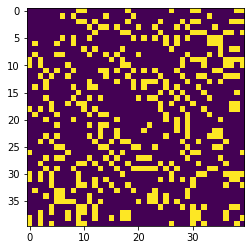

In [9]:
A = pickle.load(open('MysteryGraph.p','rb'))
plt.imshow(A)
plt.show()

In [5]:
print(A[0,:])  #check that it loaded!

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]


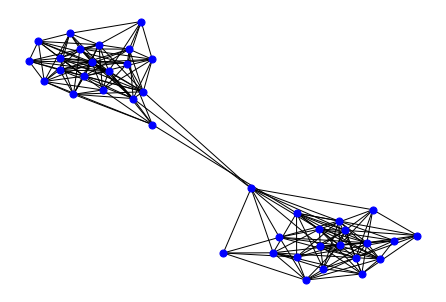

In [6]:
G = nx.from_numpy_matrix(A)
nx.draw(G, node_color='b', node_size=50, with_labels=False)
plt.show()
## Note that the networkx function that plots the graphs uses a "spring" layout,
## so it will show the two clusters. 

In [29]:
## insert your spectral clustering code here.

In [23]:
#colors = []
# for node in range(20):
#     color.append('r')

# for node in range(20, 40):
#     color.append('b')

#for node in range(20, 40):

In [67]:
def Spect_Clustering(A):
    # Declerations
    C1 = []
    C2 = []
    colors = []
    i = 1
    
    # Construct D from A, then find L
    degrees = A.sum(axis=1)  # vect of row sums of A (= degrees of vertices)
    D = np.diag(degrees)     # D = diag(degree_of_ each_vertex)
    L = D - A                # Laplacian

    # Get second eigenvector
    vals, vectors = lin.eig(L) 
    secondV = vectors[:, 1]

    # Append vertices to clusteres based on eigenvector
    for node in secondV:
        if node > 0:
            C1.append(i) #append node?
            colors.append('red')
        else:
            C2.append(i)
            colors.append('blue')
        i += 1
    
    return C1, C2, colors

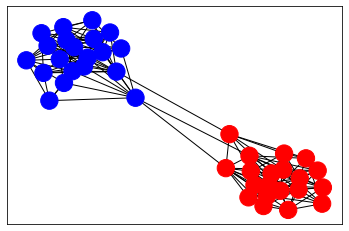

[1, 3, 5, 8, 10, 11, 13, 16, 18, 19, 25, 27, 29, 31, 32, 33, 37, 38, 39, 40]
[2, 4, 6, 7, 9, 12, 14, 15, 17, 20, 21, 22, 23, 24, 26, 28, 30, 34, 35, 36]


In [68]:
C1, C2, colors = Spect_Clustering(A)

nx.draw_networkx(G, nx.spring_layout(G), node_color=colors, with_labels=False)
plt.show()

print(C1)
print(C2)